In [109]:
#link to dataset: https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original
#Following code in this cell can be found in the same link
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
  
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
X : pd.DataFrame = breast_cancer_wisconsin_original.data.features 
y : pd.DataFrame = breast_cancer_wisconsin_original.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_original.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_original.variables) 

{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

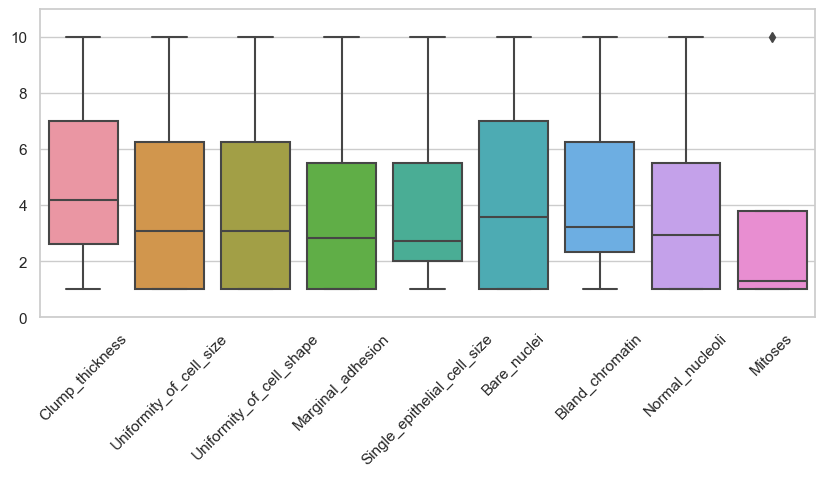

       Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
count       699.000000               699.000000                699.000000   
mean          4.417740                 3.134478                  3.207439   
std           2.815741                 3.051459                  2.971913   
min           1.000000                 1.000000                  1.000000   
25%           2.000000                 1.000000                  1.000000   
50%           4.000000                 1.000000                  1.000000   
75%           6.000000                 5.000000                  5.000000   
max          10.000000                10.000000                 10.000000   

       Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
count         699.000000                   699.000000   683.000000   
mean            2.806867                     3.216023     3.544656   
std             2.855379                     2.214300     3.643857   
min             1.000000  

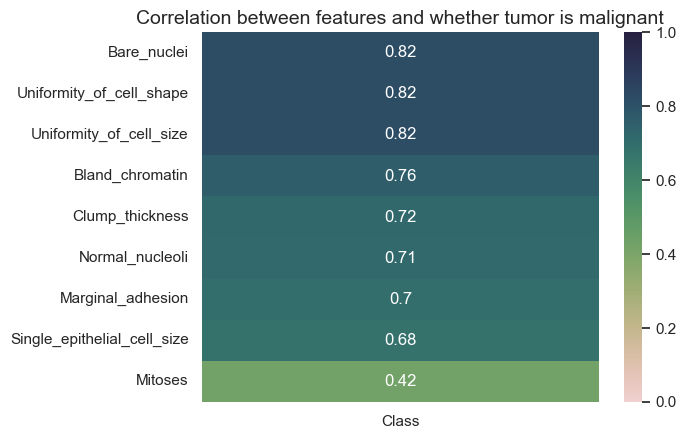

In [114]:
sns.set_theme(context='notebook', style='whitegrid', palette='husl', font='sans-serif', font_scale=1, color_codes=True, rc=None)

display = X.copy()

fig = plt.figure(figsize=(10, 4))
sns.boxplot(display.describe())
ax = fig.axes[0]
ax.set_ylim(0,11)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

display.loc[:,"Class"] = y
heatmap = sns.heatmap(display.corr()[['Class']].sort_values(by='Class', ascending=False).drop("Class"), vmin=0, vmax=1, annot=True, cmap=sns.cubehelix_palette(start=.5, rot=-1, as_cmap=True))
heatmap.set_title('Correlation between features and whether tumor is malignant', fontdict={'fontsize':14})
print(display.describe())
plt.show()


In [4]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

#Preprocessing
X["Bare_nuclei"].fillna(X["Bare_nuclei"].mean(), inplace=True)
lb = LabelBinarizer()
y['Class'] = lb.fit_transform(y['Class'].values)
targets = y['Class']
#Split data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=20,stratify=y["Class"])




C:\Users\j4wai\AppData\Local\Temp\ipykernel_27556\3774425295.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Bare_nuclei"].fillna(X["Bare_nuclei"].mean(), inplace=True)
C:\Users\j4wai\AppData\Local\Temp\ipykernel_27556\3774425295.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Class'] = lb.fit_transform(y['Class'].values)


In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay


#Available models are:
#Logistic Regression    - Model based
#KNN    - instance based
#Decision tree
#Ada boosting (bias), voting (bagging, variance), stacking (overall accuracy of high level learners) 

nieveModel = DecisionTreeClassifier()
nieveModel.fit(X_train, y_train["Class"])


logReg = LogisticRegression()
logReg = GridSearchCV(logReg, {"C":[100, 10, 1.0, 0.1, 0.01], 
                               "solver":['newton-cg', 'lbfgs', 'liblinear']}, cv=5)
logReg.fit(X_train, y_train["Class"])
logReg = logReg.best_estimator_
print("LogReg:")
print("C:", logReg.C)
print("Solver:", logReg.solver)

knn = KNeighborsClassifier()
knn = GridSearchCV(knn, {"n_neighbors": np.arange(1, 15), 
                         "metric":["euclidean", "manhattan", "minkowski"]}, cv=5)
knn.fit(X_train, y_train["Class"])
knn = knn.best_estimator_
print("KNN:")
print("n_neighbors:", knn.n_neighbors)
print("metric:", knn.metric)


tree = DecisionTreeClassifier()
tree = GridSearchCV(tree, {"criterion":["gini","entropy","log_loss"],
                           'max_depth':[1,3,5,7,10,15],
                           'min_samples_leaf':[1,3,5,10,15,20],
                           'min_samples_split':[6,8,10,12,16,18]}, cv=5)
tree.fit(X_train, y_train["Class"])
tree = tree.best_estimator_
print("tree:")
print("criterion:", tree.criterion)
print("max_depth:", tree.max_depth)
print("min_samples_lead:", tree.min_samples_leaf)
print("min_samples_split:", tree.min_samples_split)

ensemble = VotingClassifier(estimators=[("logReg", logReg), ("knn", knn), ("tree", tree)], voting="soft")
ensemble.fit(X_train, y_train["Class"])




LogReg:
C: 0.1
Solver: newton-cg
KNN:
n_neighbors: 9
metric: euclidean
tree:
criterion: gini
max_depth: 5
min_samples_lead: 3
min_samples_split: 6


VotingClassifier(estimators=[('logReg',
                              LogisticRegression(C=0.1, solver='newton-cg')),
                             ('knn',
                              KNeighborsClassifier(metric='euclidean',
                                                   n_neighbors=9)),
                             ('tree',
                              DecisionTreeClassifier(max_depth=5,
                                                     min_samples_leaf=3,
                                                     min_samples_split=6))],
                 voting='soft')

In [129]:
import numpy as np
from sklearn.model_selection import GroupShuffleSplit, KFold, StratifiedKFold, train_test_split
from sklearn.base import clone, BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score, make_scorer, precision_recall_curve

#Inspiration taken from the ThresholdClassifier class in a comment of this stackoverflow post: https://stackoverflow.com/questions/19984957/scikit-learn-predict-default-threshold
class ThresholdClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, estimator, threshold=0.5):
        self.estimator = estimator
        self.threshold = threshold

    def fit(self, X : pd.DataFrame, y : pd.Series):

        kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        kf.get_n_splits(X)
        upper = 1
        splits = 200
        self.threshold = None
        for i, (train_index, test_index) in enumerate(kf.split(X, y)):

            self.estimator_ = clone(self.estimator)
            self.estimator_.fit(X.iloc[train_index], y.iloc[train_index])

            prob_val = self.estimator_.predict_proba(X.iloc[test_index])[:,1]
            pred = self.estimator_.predict(X.iloc[test_index])

            for threshold in np.linspace(upper,0,splits)[0:-1]:
                pred = (prob_val > threshold).astype(int)
                if recall_score(y.iloc[test_index], pred) == 1:
                    upper = threshold
                    self.threshold = threshold
                    break
                splits -= 1
        if (self.threshold == None):
            self.threshold = 0.005
        self.estimator_.fit(X,y)
        
        if hasattr(self.estimator_, 'classes_'):
            self.classes_ = self.estimator_.classes_
            
        return self
    
    def predict(self, X):
        proba = self.estimator_.predict_proba(X)[:,1]
        return (proba > self.threshold).astype(int)
    
    def predict_proba(self, X):
        return self.estimator_.predict_proba(X)
    

thresholdEnsemble = ThresholdClassifier(ensemble).fit(X_train, y_train["Class"])
print(thresholdEnsemble.threshold)


0.23115577889447242



Nieve:
AUC: 0.9454115261112049
Accuracy: 0.9571428571428572
Recall: 0.9072164948453608
Precision: 0.967032967032967

LogReg:
AUC: 0.9711847219874937
Accuracy: 0.975
Recall: 0.9587628865979382
Precision: 0.96875

Knn
AUC: 0.9763393611627514
Accuracy: 0.9785714285714285
Recall: 0.9690721649484536
Precision: 0.9690721649484536

Decision Tree:
AUC: 0.9651005577150582
Accuracy: 0.9607142857142857
Recall: 0.979381443298969
Precision: 0.9134615384615384

Ensemble:
AUC: 0.973607120725593
Accuracy: 0.975
Recall: 0.9690721649484536
Precision: 0.9591836734693877


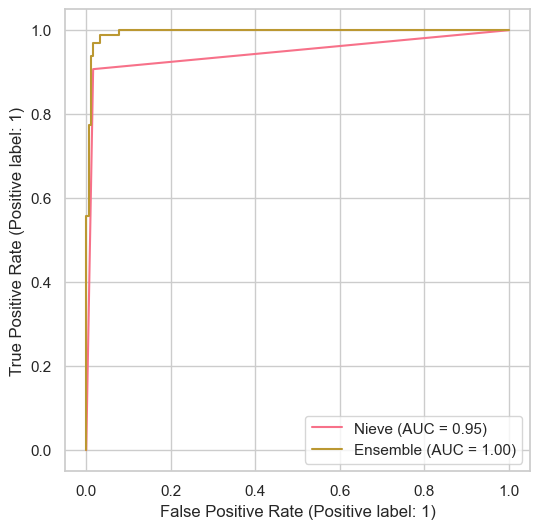


ThresholdNieve:
AUC: 0.9454115261112049
Accuracy: 0.9571428571428572
Recall: 0.9072164948453608
Precision: 0.967032967032967

ThresholdEnsemble:
0.23115577889447242
AUC: 0.9729874373274745
Accuracy: 0.9678571428571429
Recall: 0.9896907216494846
Precision: 0.9230769230769231


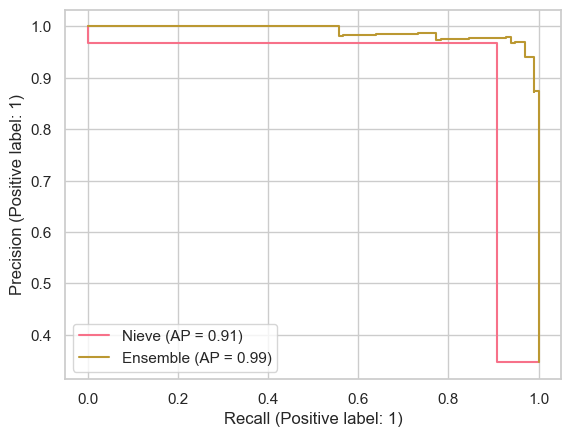

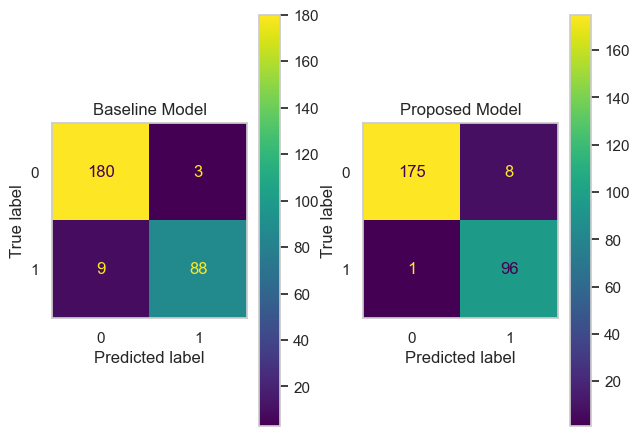

In [126]:
y_pred = nieveModel.predict(X_test)
print("\nNieve:")
print("AUC:", roc_auc_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

y_pred = logReg.predict(X_test)
print("\nLogReg:")
print("AUC:", roc_auc_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

y_pred = knn.predict(X_test)
print("\nKnn")
print("AUC:", roc_auc_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

y_pred = tree.predict(X_test)
print("\nDecision Tree:")
print("AUC:", roc_auc_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

y_pred = ensemble.predict(X_test)
print("\nEnsemble:")
print("AUC:", roc_auc_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))


fig = plt.figure(1, figsize=(6,6))
ax = plt.axes()

RocCurveDisplay.from_estimator(nieveModel, X_test, y_test, name="Nieve", ax=ax)
RocCurveDisplay.from_estimator(ensemble, X_test, y_test, name="Ensemble", ax=ax)
plt.show()
plt.clf()

fig = plt.figure(1, figsize=(6,6))
ax = plt.axes()
PrecisionRecallDisplay.from_estimator(nieveModel, X_test, y_test, name = "Nieve", ax=ax)
PrecisionRecallDisplay.from_estimator(ensemble, X_test, y_test, name = "Ensemble", ax=ax)

fig, axes = plt.subplots(1, 2)
fig.tight_layout()
y_pred = nieveModel.predict(X_test)
print("\nThresholdNieve:")
print("AUC:", roc_auc_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
ax = plt.Axes = axes[0]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)
ax.set_title("Baseline Model")
ax.grid(False)


y_pred = thresholdEnsemble.predict(X_test)
print("\nThresholdEnsemble:")
print(thresholdEnsemble.threshold)
print("AUC:", roc_auc_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
ax : plt.Axes = axes[1]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)
ax.set_title("Proposed Model")
ax.grid(False)


